# Báo cáo giữa kỳ - Môn Python for Data Science
## K-Means Clsutering Algorithm
**Nhóm sinh viên thực hiện:**
* Đinh Anh Huy   - MSSV : 18110103
* Nguyễn Đức Vũ Duy - MSSV : 18110004

## Ví dụ trên Python
Khai báo các thư viện cần dùng.

In [1]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
import random
np.random.seed(18)

Tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại `(2, 2), (8, 3)` và `(3, 6)`, ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cụm có 500 điểm. Hiển thị các cụm điểm trên đồ thị.

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

Viết hàm `kmeans_display` để hiển thị dữ liệu. Sau đó hiển thị dữ liệu theo nhãn ban đầu.

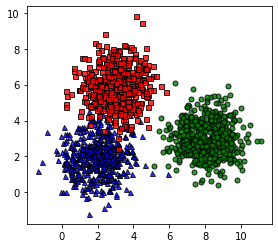

In [3]:
def kmeans_display(X, label, filename = 'data.pdf'):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    with PdfPages(filename) as pdf:       
        kwargs = {"markersize": 5, "alpha": .8, "markeredgecolor": 'k'}
        plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
        plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
        plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

        plt.axis([-3, 14, -2, 10])
        plt.axis('scaled')
        plt.plot()
        pdf.savefig(bbox_inches='tight')
        plt.show()
    
kmeans_display(X, original_label)

Viết các hàm:
1. `kmeans_init_centroids` để khởi tạo các điểm đại diện ban đầu.
2. `kmeans_asign_labels` để gán nhán mới cho các điểm tương ứng với các điểm đại diện.
3. `kmeans_update_centroids` để cập nhật các điểm đại diện mới dữa trên dữ liệu vừa được gán nhãn.
4. `há_converged` để kiểm tra điều kiện dừng của thuật toán.

In [4]:
#Khởi tạo tâm cụm
def kmeans_init_centroids(X, k):
    #Chọn ngẫu nhiên k dòng của X để tạo tâm cụm
    return X[np.random.choice(X.shape[0], k, replace=False)]

#Tìm nhãn mới cho các điểm khi biết tâm cụm
def kmeans_assign_labels(X, centroids):
    #Tính khoảng cách giữa X và tâm cụm
    D = cdist(X, centroids)
    #Trả về Tâm cụm gần nhất
    return np.argmin(D, axis = 1)

#Kiểm tra tính hội tụ, điều kiện dừng của bài toán
def has_converged(centroids, new_centroids):
    #Trả về True nếu tập hợp 2 tâm cụm là như nhau
    return (set([tuple(a) for a in centroids]) ==set([tuple(a) for a in new_centroids]))

#Cập nhật Tâm cụm khi biết nhãn của từng điểm
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        #Tập hợp tất cả các điểm mà ứng với tâm cụm thứ k
        Xk = X[labels == k, :]
        #Tính trung bình
        centroids[k,:] = np.mean(Xk, axis = 0)
    return centroids

Phần chính của K-means Clustering.

In [5]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

Áp dụng thuật toán vừa viết vào dữ liệu ban đầu, hiển thị kết quả cuối cùng. 

Centers found by our algorithm:
 [[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]


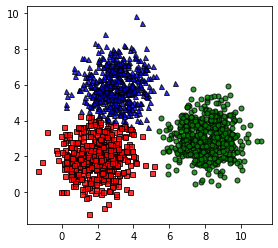

In [6]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1], 'res.jpg')

Từ kết quả này chúng ta thấy rằng thuật toán K-means Clustering làm việc khá thành công, các centroids tìm được khá gần với kỳ vọng ban đầu. Mặc dù màu sắc của hai nhóm xanh, đỏ đã bị hoán đổi nhưng những điểm ban đầu thuộc cùng một cluster gần như vẫn cùng thuộc một cluster.

### Kết quả tìm được bằng thư viện scikit-learn

Centers found by scikit-learn:
[[1.98417154 1.96141961]
 [8.07476866 3.01494931]
 [3.02429957 5.95334038]]


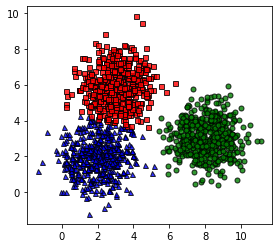

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label, 'res_scikit.pdf')

Chúng ta thấy rằng hai thuật toán khác nhau cho cùng một đáp số. Với cách thứ nhất, tôi mong muốn các bạn hiểu rõ được thuật toán. Với cách thứ hai, tôi hy vọng các bạn biết áp dụng thư viện sẵn có như thế nào.

## Hiển thị kết quả sau mỗi vòng lặp 

### Voronoi


In [8]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from voronoi import voronoi_finite_polygons_2d
vor = Voronoi(centroids[-1])
def kmeans_display_progress(X, centroids, labels, it, filename = 'ex.pdf', saving = False):
    label = labels[it] # label at iteration it 
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
#     filename = pre + '_' + str(it) + '.pdf'
    with PdfPages(filename) as pdf:
        # draw data points with color 
        kwargs = {"markersize": 5, "alpha": 1, "markeredgecolor": 'k'}
        plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
        plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
        plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

        # draw centroids 
        points = centroids[it]
        kwargs = {"markersize": 15, "markeredgecolor": 'k'}
        animlist = plt.plot(points[0, 0], points[0, 1], 'y^', **kwargs)
        animlist = plt.plot(points[1, 0], points[1, 1], 'yo', **kwargs)
        animlist = plt.plot(points[2, 0], points[2, 1], 'ys', **kwargs)

        # draw color for each voronoi region 
        colors = ['b', 'g', 'r']

        vor = Voronoi(points)
        regions, vertices = voronoi_finite_polygons_2d(vor, radius = 1000)
        for i,region in enumerate(regions):
            polygon = vertices[region]
            animlist = plt.fill(*zip(*polygon), alpha=.2, color = colors[i])
        plt.axis('scaled')
        plt.title('iteration: %d/%d' %(it+1, len(labels)))
        plt.axis([-2, 11, -2, 10])
        if saving:
            pdf.savefig(bbox_inches='tight')
        plt.show()

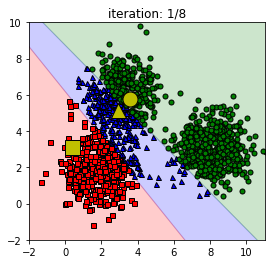

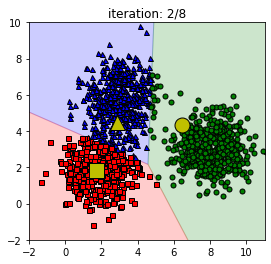

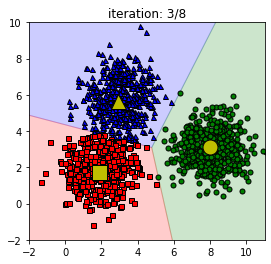

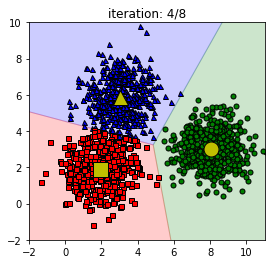

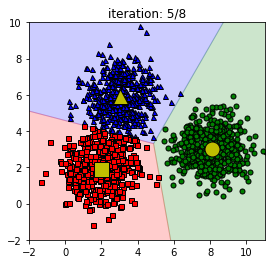

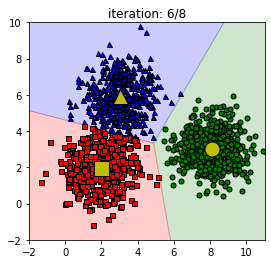

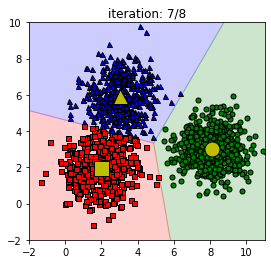

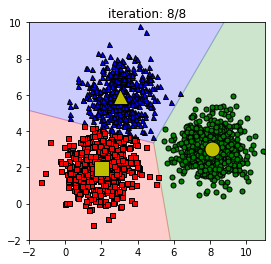

In [9]:
iters = range(8)
for it in iters:
    filename = 'ex_' + str(it) + 'notitle.pdf'
    kmeans_display_progress(X, centroids, labels, it, filename, saving = True)

## Slow convergence 

In [10]:
for i in range(6):
    np.random.seed(9*i)
    (centroids, labels, it) = kmeans(X, K)
    print('Seed number:', 9*i, '- Number of iterations:', len(labels))

Seed number: 0 - Number of iterations: 5
Seed number: 9 - Number of iterations: 9
Seed number: 18 - Number of iterations: 7
Seed number: 27 - Number of iterations: 9
Seed number: 36 - Number of iterations: 17
Seed number: 45 - Number of iterations: 8


Từ đây ta có thể thấy rằng với các khởi tạo khác nhau, số lượng vòng lặp là khác nhau. 

## Nghiệm tìm được không như nhau 


In [11]:
for i in range(10):
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    print('Seed number:', 9*i, '- Number of iterations:', len(labels))
    print(centroids[-1])

Seed number: 0 - Number of iterations: 5
[[1.9834967  1.96588127]
 [8.07476866 3.01494931]
 [3.02702878 5.95686115]]
Seed number: 9 - Number of iterations: 5
[[1.9834967  1.96588127]
 [8.07476866 3.01494931]
 [3.02702878 5.95686115]]
Seed number: 18 - Number of iterations: 8
[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.96588127]]
Seed number: 27 - Number of iterations: 8
[[8.07476866 3.01494931]
 [1.9834967  1.96588127]
 [3.02702878 5.95686115]]
Seed number: 36 - Number of iterations: 12
[[7.12732511 2.99368119]
 [8.8276255  3.04654827]
 [2.49140607 3.97745917]]
Seed number: 45 - Number of iterations: 26
[[7.1620092  3.31474145]
 [2.48862459 3.97494222]
 [8.78494118 2.78510399]]
Seed number: 54 - Number of iterations: 5
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
Seed number: 63 - Number of iterations: 26
[[2.49140607 3.97745917]
 [7.12732511 2.99368119]
 [8.8276255  3.04654827]]
Seed number: 72 - Number of iterations: 6
[[3.02702878 

Ta có thể thấy rằng, ứng với 10 lần chọn các tâm cụm khác nhau thì sẽ cho ra 10 các kết quả khác nhau.

10


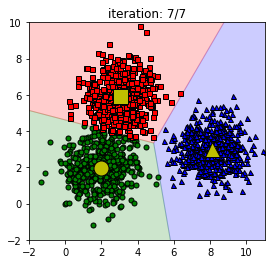

30


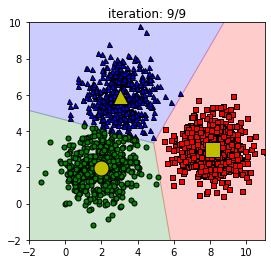

27


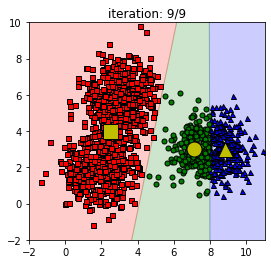

In [12]:
for i in [10, 30, 27]:
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    it = len(labels) - 1
    print(i)
    filename = 'dif_res' + str(i) + '.pdf'
    kmeans_display_progress(X, centroids, labels, it, filename, saving = True)

Ta thấy rằng trong 3 trường hợp ứng với 3 lần lấy ngẫu nhiên tâm cụm sẽ cho ra 3 kết quả khác nhau. Trong đó trường hợp thứ 3 lại cho ra kết quả phân cụm không tốt bằng 2 trường hợp còn lại, tuy 2 trường hợp còn lại có kết quả phân cụm gần tương đương nhau nhưng trường hợp thứ 2 lại tốn nhiều hơn 2 vòng lặp để cho ra kết quả cuối cùng.